# Homework 3: Mining Data Streams 

#### Team Members: Noel Karlsson Johansson, Alexander Olsson

### Instructions:
1. Download the dataset from the link on canvas
2. Place the file in any directory you want
3. Change the path in the code below to the path of the file
4. Place the classes.py in the same directory as the main.ipynb file
5. Install the packages in the requirements.txt file
6. Run the code

In [1]:
from classes import *

### Dataset & Path

In [6]:
path = "../data/web-NotreDame.txt"
dataset = Dataset(path)

Reading graph...
Time to read graph: 4.760864019393921


### Triest Base

In [ ]:
M = [1000, 5000, 10000]
iterations = 5
estimations = []

for m in M:
    for i in range(iterations):
        print(f"Running iteration {i} with M = {m}")
        start = time.time()
        triest = TriestBase(m)
        triangles = triest(dataset.get_stream())
        end = time.time()
        estimations.append((i, m, triangles, end - start))

print(estimations)

with open("data/triest_base.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerow(["iteration", "M", "triangles", "time"])
    writer.writerows(estimations)

### Triest Impr

In [ ]:
M = [1000, 5000, 10000]
iterations = 5
estimations = []

for m in M:
    for i in range(iterations):
        print(f"Running iteration {i} with M = {m}")
        start = time.time()
        triest = TriestImpr(m)
        triangles = triest(dataset.get_stream())
        end = time.time()
        estimations.append((i, m, triangles, end - start))

print(estimations)

with open("data/triest_impr.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerow(["iteration", "M", "triangles", "time"])
    writer.writerows(estimations)

## Results

| Dataset Name | Nodes | Edges | Triangles | Source |
| :---: | :---: | :---: | :---: | :---: |
| Notre Dame | 325 729 | 1 497 134 | 8 910 005 | https://snap.stanford.edu/data/web-NotreDame.html |
| Social circles: Facebook | 4 039 | 88 234 | 1 612 010 | https://snap.stanford.edu/data/ego-Facebook.html | 

### Dataset NotreDame
#### Set the path to the output files

In [2]:
path_triest_base = "../output/triest_base_notredame.csv"
path_triest_impr = "../output/triest_impr_notredame.csv"

MAE for Triest Base: 7592974.929289789
MAPE for Triest Base: 85.21852601979225
MAE for Triest Impr: 7592974.929289789
MAPE for Triest Impr: 85.21852601979225


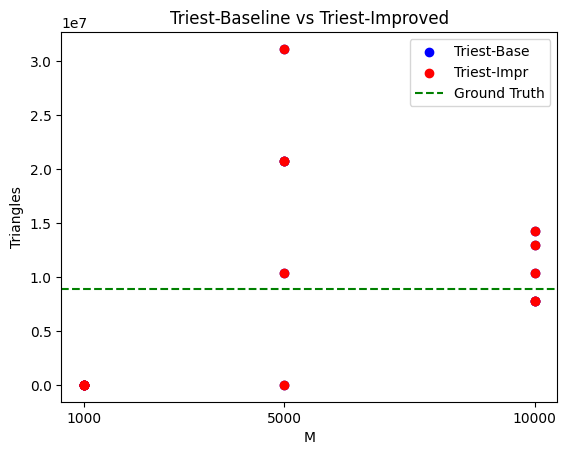

In [3]:
plot(path_triest_base, path_triest_base, 8910005)

### Dataset Facebook
#### Set the path for the output files

In [4]:
path_triest_base = "../output/triest_base_facebook.csv"
path_triest_impr = "../output/triest_impr_facebook.csv"

MAE for Triest Base: 192470.12503122631
MAPE for Triest Base: 11.939759991019056
MAE for Triest Impr: 57843.64214717753
MAPE for Triest Impr: 3.588293009793831


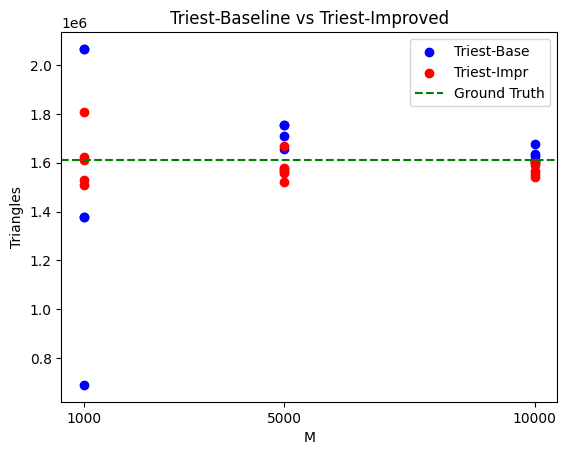

In [5]:
plot(path_triest_base, path_triest_impr, 1612010)

## Questions

#### 1. What were the challenges you faced when implementing the algorithm?
there is a lot of math

#### 2. Can the algorithm be easily parallelized? If yes, how? If not, why? Explain.
It can be done, but as the operation of increasing and decreasing the counters are not atomic, it would require some kind of locking mechanism to ensure that the counters are not updated by multiple threads at the same time. This would be a performance hit for the paralleliztion. Calculating the neighborhood of a node can be done in parallel, but the counters would have to be updated sequentially.


#### 3. Does the algorithm work for unbounded graph streams? Explain.
Yes, the Triest algorithm uses reservoir sampling which is a method that enables it to handle unbounded graph streams. The method works by using a fixed-sized memory, commonly referred to as the reservoir, which collects edges from the stream. When the reservoir is full, it discards old edges and samples new ones from the stream, where each edge has an equal probability of being included. This approach helps the Triest algorithm work with graphs that are too large to fit into memory.

#### 4. Does the algorithm support edge deletions? If not, what modification would it need? Explain.
The Triest algorithm currently lacks support for edge deletions. To accommodate edge deletions, the algorithm would necessitate the inclusion of mechanisms to track and manage deleted edges within the reservoir. This modification would incur additional memory usage and computational overhead to efficiently identify and remove the deleted edges from the reservoir. A solution to this is implemented in the paper "Triest: Counting Local and Global Triangles in Fully-Dynamic Streams with Fixed Memory Size" by De Stefani et al. (2016). The algorithm is called Triest-FD.